# Read in PSSM files and Generate Heat Map of Results

In [2]:
# Read in all files present in pssms folder

import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = "pssms/"
all_files = glob.glob(os.path.join(path, "*.csv"))

# Generate master concatenated dataframe 
concatenated_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
print(concatenated_df)

# Generate list of split seeds and population seeds for title
split_seeds = concatenated_df["split_seed"].tolist()
split_seeds = sorted(set(split_seeds))

split = [str(i) for i in split_seeds]
new_splits = "_".join(split)

seed = concatenated_df['pop_seed'].unique()



      A   U   C   G  split_seed  pop_seed  position
0    -4  16   3 -14          80         5         1
1   -16  12  12  -8          80         5         2
2     9  -7   1  -3          80         5         3
3     0  -4   9  -5          80         5         4
4    -4  -5  12  -2          80         5         5
..   ..  ..  ..  ..         ...       ...       ...
445  14  -7   5 -12          20         5        41
446  -4   0   0   5          20         5        42
447 -13   9   8  -3          20         5        43
448   4  -4  -1   0          20         5        44
449   2 -10  -2  10          20         5        45

[450 rows x 7 columns]


In [3]:
concatenated_melt = pd.melt(
    concatenated_df,
    value_vars=["A","C","G","U"],
    var_name="base",
    value_name="score",
    id_vars=["split_seed","pop_seed","position"]
).reset_index(drop=True)
concatenated_melt

,split_seed,pop_seed,position,base,score
0,80,5,1,A,-4
1,80,5,2,A,-16
2,80,5,3,A,9
3,80,5,4,A,0
4,80,5,5,A,-4
...,...,...,...,...,...
1795,20,5,41,U,-7
1796,20,5,42,U,0
1797,20,5,43,U,9
1798,20,5,44,U,-4


<Figure size 600x1500 with 0 Axes>

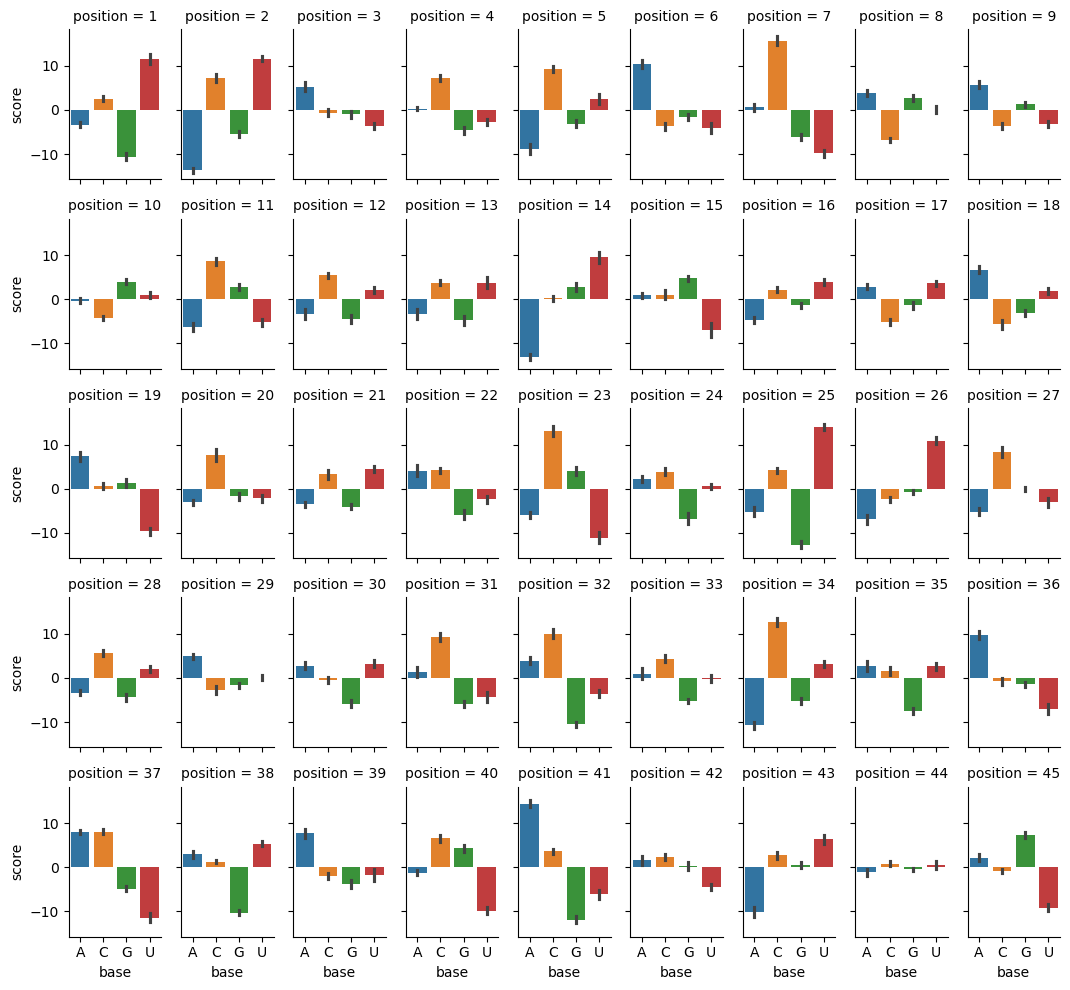

In [18]:
plt.figure(figsize=(6, 15))
# grouped = concatenated_melt.groupby(by=["position","base"])
svm = sns.catplot(
    concatenated_melt,
    x="base",y="score",
    kind="bar",col="position",
    errorbar="se",aspect=.6,
    col_wrap=9, hue="base", height=2)

svm.set_xticklabels(["A", "C", "G", "U"])

# plt.show()

# figure = svm.get_figure()
outfile = f"barplots/barplot_se_bdna_data_KL25082020_split_seed-{new_splits}_pop_seed-{seed[0]}.png"
svm.savefig(outfile)